<a href="https://colab.research.google.com/github/Audrey-ai/Carrefour-Kenya-Data-Analysis-using-R/blob/main/Part_1_Dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Defining the Question

Working as a data scientist at Carrefour Kenya, the main aim is to undertake a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax) by performing various unsupervised learning techniques and later providing recommendations based on your insights.


This section of the project entails reducing the dataset to a low dimensional dataset using the t-SNE algorithm or PCA and perform analysis and provide insights gained from the analysis.

#2. Reading and checking of data

In [ ]:
#Load the readr library to bring in the dataset
library(readr)

#Reading and checking the sales data
Sales <- read.csv('Supermarket_Sales_Data.csv')
head(Sales)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
6,699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


In [ ]:
#Checking the dimensions of the table

dim(Sales)

[1] 1000   16

In [ ]:
#Displaying the type and a preview of all columns
#

library(dplyr)
glimpse(Sales)

Rows: 1,000
Columns: 16
$ Invoice.ID              <chr> "750-67-8428", "226-31-3081", "631-41-3108", "…
$ Branch                  <chr> "A", "C", "A", "A", "A", "C", "A", "C", "A", "…
$ Customer.type           <chr> "Member", "Normal", "Normal", "Member", "Norma…
$ Gender                  <chr> "Female", "Female", "Male", "Male", "Male", "M…
$ Product.line            <chr> "Health and beauty", "Electronic accessories",…
$ Unit.price              <dbl> 74.69, 15.28, 46.33, 58.22, 86.31, 85.39, 68.8…
$ Quantity                <int> 7, 5, 7, 8, 7, 7, 6, 10, 2, 3, 4, 4, 5, 10, 10…
$ Tax                     <dbl> 26.1415, 3.8200, 16.2155, 23.2880, 30.2085, 29…
$ Date                    <chr> "1/5/2019", "3/8/2019", "3/3/2019", "1/27/2019…
$ Time                    <chr> "13:08", "10:29", "13:23", "20:33", "10:37", "…
$ Payment                 <chr> "Ewallet", "Cash", "Credit card", "Ewallet", "…
$ cogs                    <dbl> 522.83, 76.40, 324.31, 465.76, 604.17, 597.73,…
$ gross.margin.p

In [ ]:
#Checking on summary statistics of numeric variables

summary(Sales)

  Invoice.ID           Branch          Customer.type         Gender         
 Length:1000        Length:1000        Length:1000        Length:1000       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 Product.line         Unit.price       Quantity          Tax         
 Length:1000        Min.   :10.08   Min.   : 1.00   Min.   : 0.5085  
 Class :character   1st Qu.:32.88   1st Qu.: 3.00   1st Qu.: 5.9249  
 Mode  :character   Median :55.23   Median : 5.00   Median :12.0880  
                    Mean   :55.67   Mean   : 5.51   Mean   :15.3794  
                    3rd Qu.:77.94   3rd Qu.: 8.00   3rd Qu.:22.4453  
                    Max.   :99.96   Max. 

#3. Data Cleaning

In [ ]:
#Checking for missing values in the columns of our dataset
#

colSums(is.na(Sales))

#There is no missing data in any column

Invoice.ID                  Branch           Customer.type 
                      0                       0                       0 
                 Gender            Product.line              Unit.price 
                      0                       0                       0 
               Quantity                     Tax                    Date 
                      0                       0                       0 
                   Time                 Payment                    cogs 
                      0                       0                       0 
gross.margin.percentage            gross.income                  Rating 
                      0                       0                       0 
                  Total 
                      0

In [ ]:
#Checking for duplicate data
#

duplicated <- Sales[duplicated(Sales),]
duplicated

#There are no duplicates in our data

Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


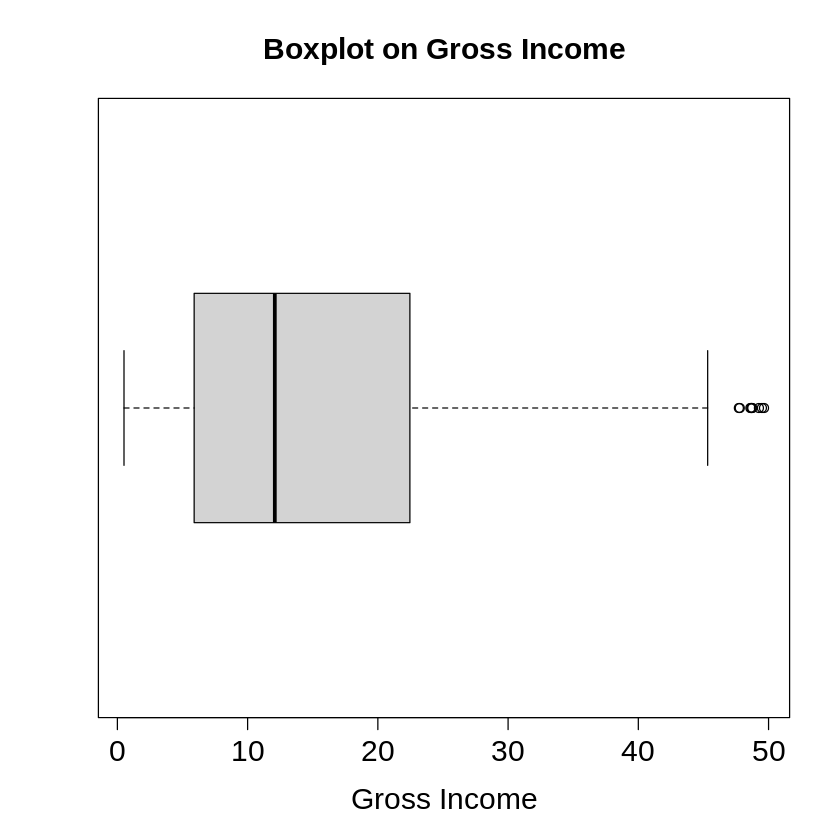

In [ ]:
#Checking for outliers in Gross income column
#

boxplot(Sales$gross.income, 
main = "Boxplot on Gross Income",
xlab = "Gross Income",
horizontal=TRUE,
cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)

#There are a few outliers that are not so far from the third quartile

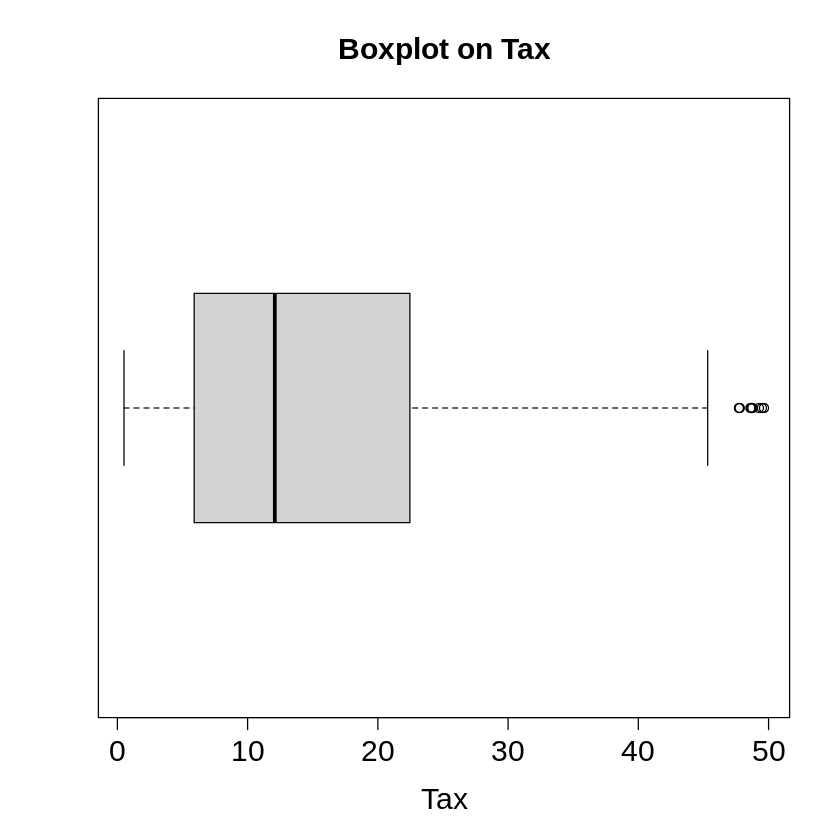

In [ ]:
#Checking for outliers in Tax column
#

boxplot(Sales$Tax, 
main = "Boxplot on Tax",
xlab = "Tax",
horizontal=TRUE,
cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)

#There are a few outliers that are not so far from the third quartile

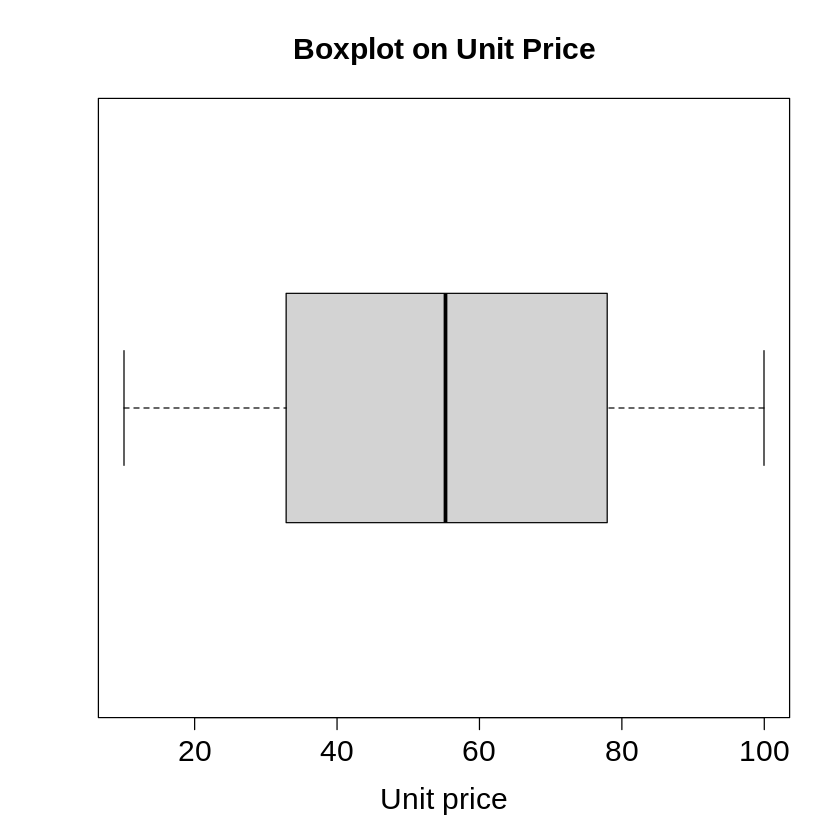

In [ ]:
#Checking for outliers in Unit price column
#

boxplot(Sales$Unit.price, 
main = "Boxplot on Unit Price",
xlab = "Unit price",
horizontal=TRUE,
cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)

#There are no outliers

#4. Exploratory Data Analysis

##4.a) Univariate Analysis

In [ ]:
#First checking out the class of each column

cls <- sapply(Sales, class)
cls

#Next selecting Numeric Variables
Numeric_Variables <- Sales %>% select(which(cls != "character"))
head(Numeric_Variables)


#Excluding categorical numerical variables to remain with only continuous variables
Continuous_Variables <- Numeric_Variables[,c(-2,-5)]
head(Continuous_Variables)

Invoice.ID                  Branch           Customer.type 
            "character"             "character"             "character" 
                 Gender            Product.line              Unit.price 
            "character"             "character"               "numeric" 
               Quantity                     Tax                    Date 
              "integer"               "numeric"             "character" 
                   Time                 Payment                    cogs 
            "character"             "character"               "numeric" 
gross.margin.percentage            gross.income                  Rating 
              "numeric"               "numeric"               "numeric" 
                  Total 
              "numeric"

,Unit.price,Quantity,Tax,cogs,gross.margin.percentage,gross.income,Rating,Total
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,74.69,7,26.1415,522.83,4.761905,26.1415,9.1,548.9715
2,15.28,5,3.8200,76.40,4.761905,3.8200,9.6,80.2200
3,46.33,7,16.2155,324.31,4.761905,16.2155,7.4,340.5255
4,58.22,8,23.2880,465.76,4.761905,23.2880,8.4,489.0480
5,86.31,7,30.2085,604.17,4.761905,30.2085,5.3,634.3785
6,85.39,7,29.8865,597.73,4.761905,29.8865,4.1,627.6165


,Unit.price,Tax,cogs,gross.income,Rating,Total
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,74.69,26.1415,522.83,26.1415,9.1,548.9715
2,15.28,3.8200,76.40,3.8200,9.6,80.2200
3,46.33,16.2155,324.31,16.2155,7.4,340.5255
4,58.22,23.2880,465.76,23.2880,8.4,489.0480
5,86.31,30.2085,604.17,30.2085,5.3,634.3785
6,85.39,29.8865,597.73,29.8865,4.1,627.6165


In [ ]:
#Summary Statistics on Continuous Variables
#

summary(Continuous_Variables)

#From the below summary, we can be able to tell the minimum, maximum,median,mean,1st and 3rd quartiles
#and range of selected continuous variables

   Unit.price         Tax               cogs         gross.income    
 Min.   :10.08   Min.   : 0.5085   Min.   : 10.17   Min.   : 0.5085  
 1st Qu.:32.88   1st Qu.: 5.9249   1st Qu.:118.50   1st Qu.: 5.9249  
 Median :55.23   Median :12.0880   Median :241.76   Median :12.0880  
 Mean   :55.67   Mean   :15.3794   Mean   :307.59   Mean   :15.3794  
 3rd Qu.:77.94   3rd Qu.:22.4453   3rd Qu.:448.90   3rd Qu.:22.4453  
 Max.   :99.96   Max.   :49.6500   Max.   :993.00   Max.   :49.6500  
     Rating           Total        
 Min.   : 4.000   Min.   :  10.68  
 1st Qu.: 5.500   1st Qu.: 124.42  
 Median : 7.000   Median : 253.85  
 Mean   : 6.973   Mean   : 322.97  
 3rd Qu.: 8.500   3rd Qu.: 471.35  
 Max.   :10.000   Max.   :1042.65  

In [ ]:
#Finding the variance of continous variables
#

var(Continuous_Variables)

#the variance of ontinuous variables can be obtained along the diagonal column of the below output

,Unit.price,Tax,cogs,gross.income,Rating,Total
Unit.price,701.9653313,196.6683401,3933.36680,196.6683401,-0.3996675,4130.03514
Tax,196.6683401,137.0965941,2741.93188,137.0965941,-0.7333003,2879.02848
cogs,3933.3668019,2741.9318829,54838.63766,2741.9318829,-14.6660055,57580.56954
gross.income,196.6683401,137.0965941,2741.93188,137.0965941,-0.7333003,2879.02848
Rating,-0.3996675,-0.7333003,-14.66601,-0.7333003,2.9535182,-15.39931
Total,4130.0351420,2879.0284770,57580.56954,2879.0284770,-15.3993058,60459.59802


Product
Electronic accessories    Fashion accessories     Food and beverages 
                   170                    178                    174 
     Health and beauty     Home and lifestyle      Sports and travel 
                   152                    160                    166 

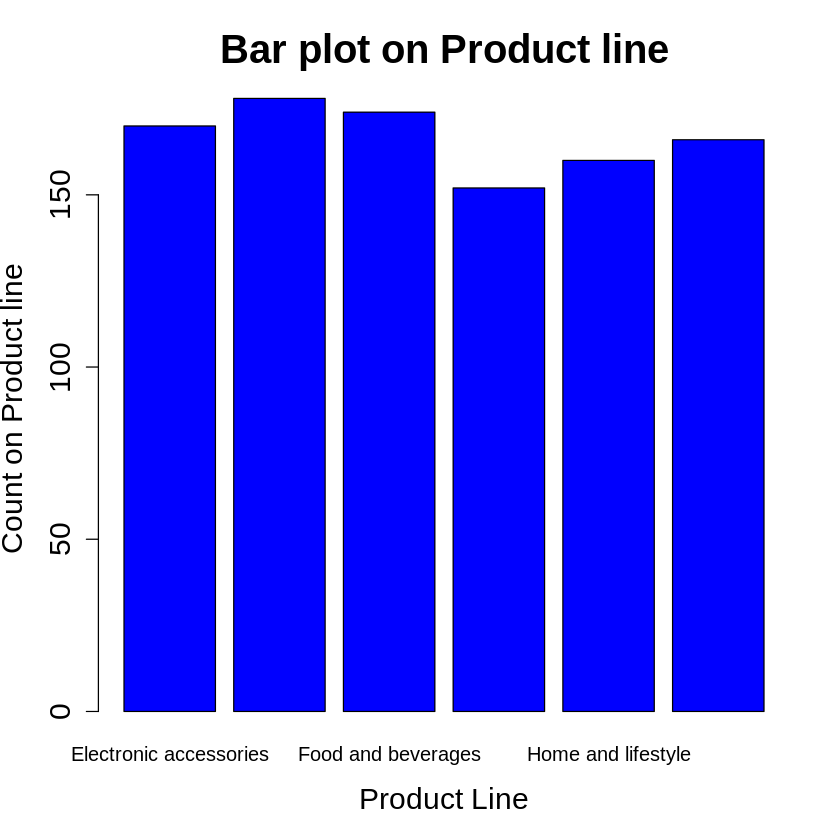

In [ ]:
#Creating bar plot on Product Line
#
#First creating frequency distribution on Product line
#

Product <- Sales$Product.line
Product_frequency <- table(Product)
Product_frequency

#Creating a bar plot to reflect the same
barplot(Product_frequency,
main = 'Bar plot on Product line',
xlab = 'Product Line',
ylab = 'Count on Product line',
col = 'Blue',
cex.lab=1.5, cex.axis=1.5, cex.main=2.0, cex.sub=1.5)

#Majority of products are fashion accessories

customer
Member Normal 
   501    499 

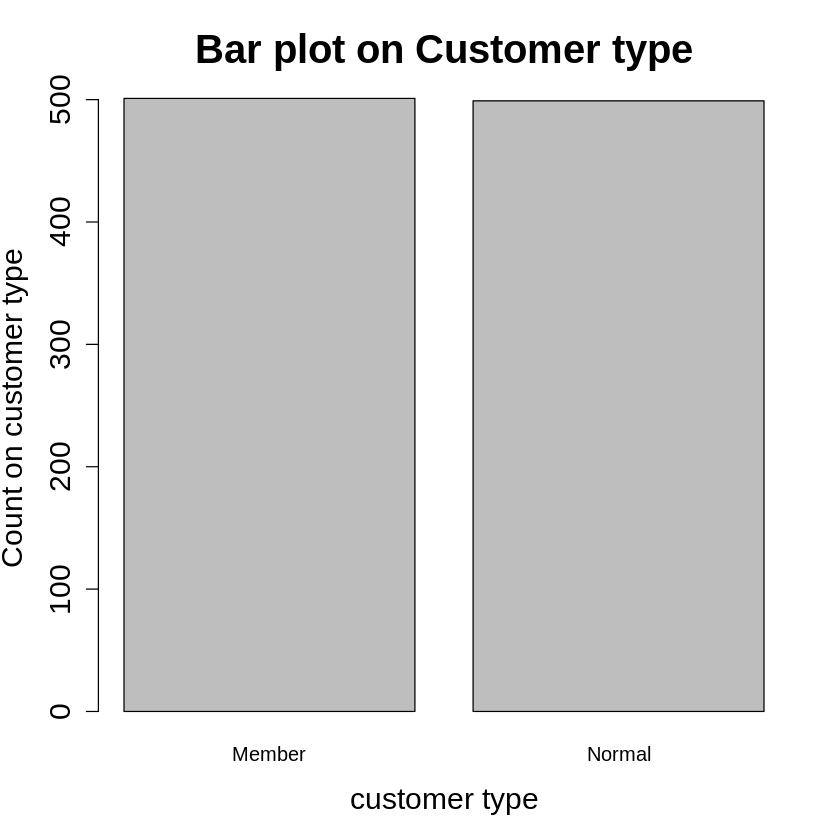

In [ ]:
#Creating bar plot on customer type
#
#First creating frequency distribution on customer type
#

customer <- Sales$Customer.type
customer_frequency <- table(customer)
customer_frequency

#Creating a bar plot to reflect the same
barplot(customer_frequency,
main = 'Bar plot on Customer type',
xlab = 'customer type',
ylab = 'Count on customer type',
col = 'Grey',
cex.lab=1.5, cex.axis=1.5, cex.main=2.0, cex.sub=1.5)

#We see a balance of Member and normal customer type, with a very slight large proportion in member
#than normal customer type

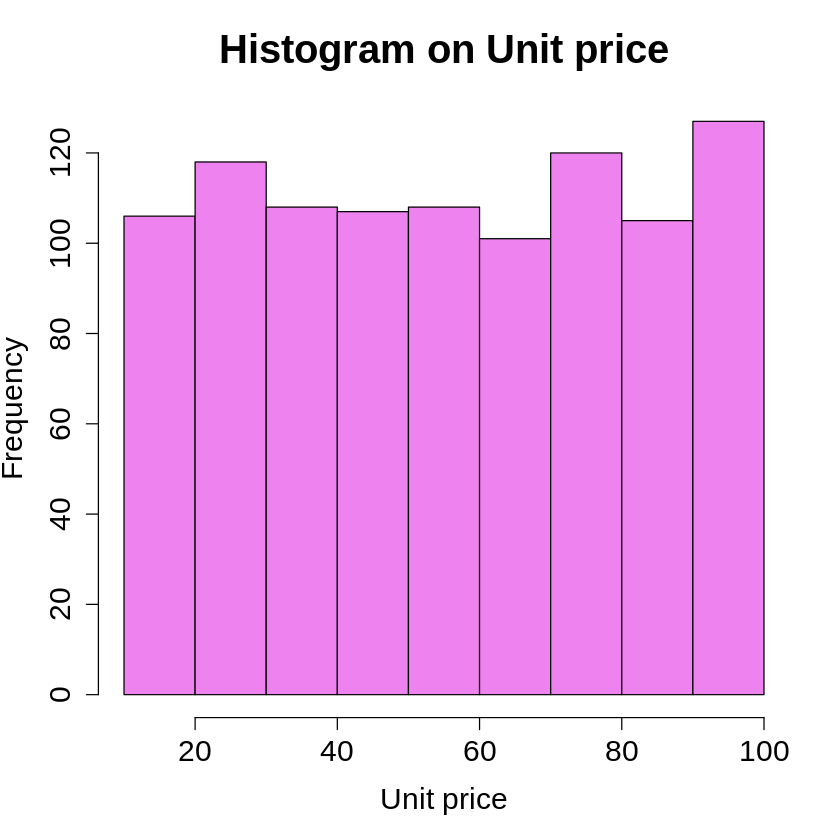

In [ ]:
#Histogram on Unit price

hist(Sales$Unit.price,
main = "Histogram on Unit price",
xlab = "Unit price",
ylab = 'Frequency',
col = 'Violet',
cex.lab=1.5, cex.axis=1.5, cex.main=2.0, cex.sub=1.5)

##4.b) Bivariate analysis

In [ ]:
#Obtaining the covariance matrix for our variables

cov(Continuous_Variables)

#We do notice a negative linear relationship between Rating and the rest of the variables

,Unit.price,Tax,cogs,gross.income,Rating,Total
Unit.price,701.9653313,196.6683401,3933.36680,196.6683401,-0.3996675,4130.03514
Tax,196.6683401,137.0965941,2741.93188,137.0965941,-0.7333003,2879.02848
cogs,3933.3668019,2741.9318829,54838.63766,2741.9318829,-14.6660055,57580.56954
gross.income,196.6683401,137.0965941,2741.93188,137.0965941,-0.7333003,2879.02848
Rating,-0.3996675,-0.7333003,-14.66601,-0.7333003,2.9535182,-15.39931
Total,4130.0351420,2879.0284770,57580.56954,2879.0284770,-15.3993058,60459.59802


,Unit.price,Tax,cogs,gross.income,Rating,Total
Unit.price,1.000000000,0.6339621,0.6339621,0.6339621,-0.008777507,0.6339621
Tax,0.633962089,1.0000000,1.0000000,1.0000000,-0.036441705,1.0000000
cogs,0.633962089,1.0000000,1.0000000,1.0000000,-0.036441705,1.0000000
gross.income,0.633962089,1.0000000,1.0000000,1.0000000,-0.036441705,1.0000000
Rating,-0.008777507,-0.0364417,-0.0364417,-0.0364417,1.000000000,-0.0364417
Total,0.633962089,1.0000000,1.0000000,1.0000000,-0.036441705,1.0000000


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



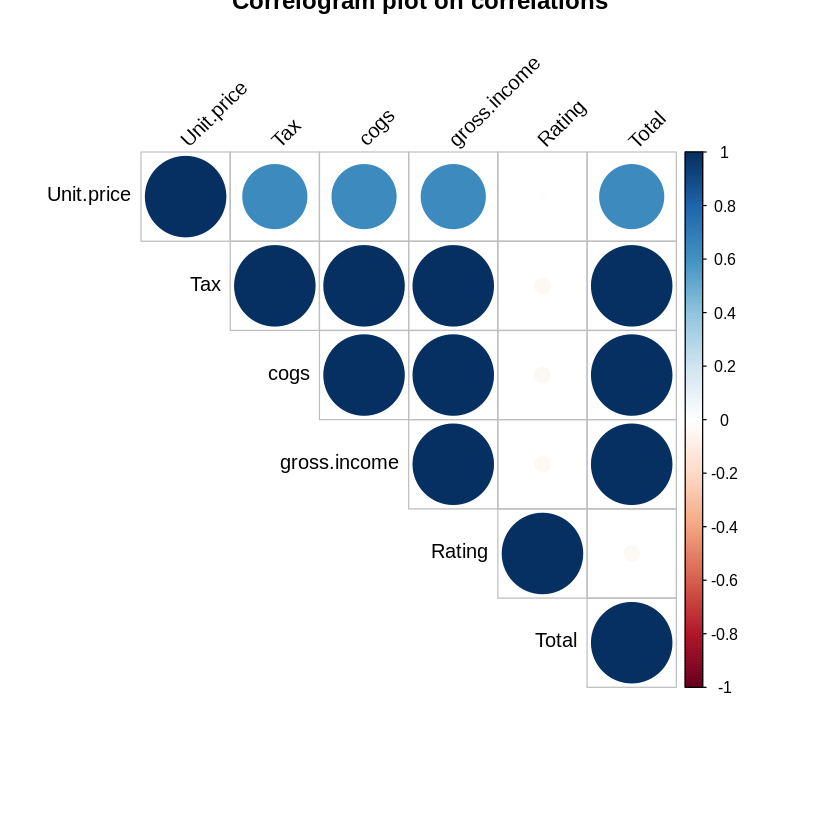

In [ ]:
#Checking on correlation on continous variables
#

#Creating correlation matrix
correlation <- cor(Continuous_Variables)
correlation

#Creating a correlogram
install.packages("corrplot")
library(corrplot)
corrplot(correlation, type = "upper", order = "original",main = 'Correlogram plot on correlations', 
         tl.col = "black", tl.srt = 45)

#We do notice a negative correlation between Rating and the rest of the variables

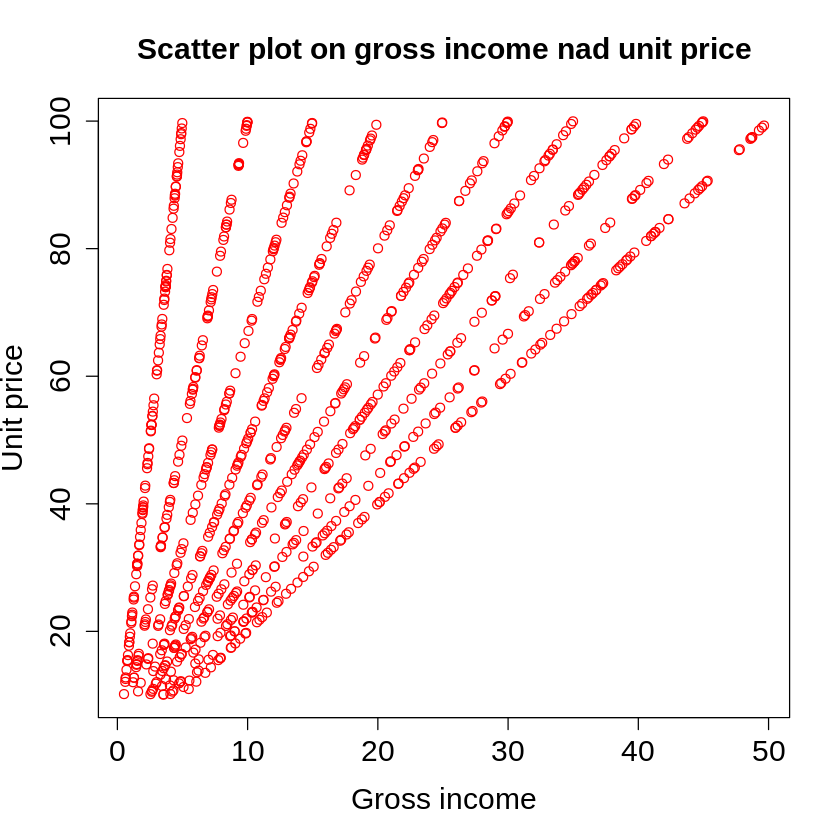

In [ ]:
#Scatter plot on gross income nad unit price

plot(Sales$gross.income,Sales$Unit.price,
main = 'Scatter plot on gross income nad unit price', 
xlab="Gross income", 
ylab="Unit price",
col = 'Red',
cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)


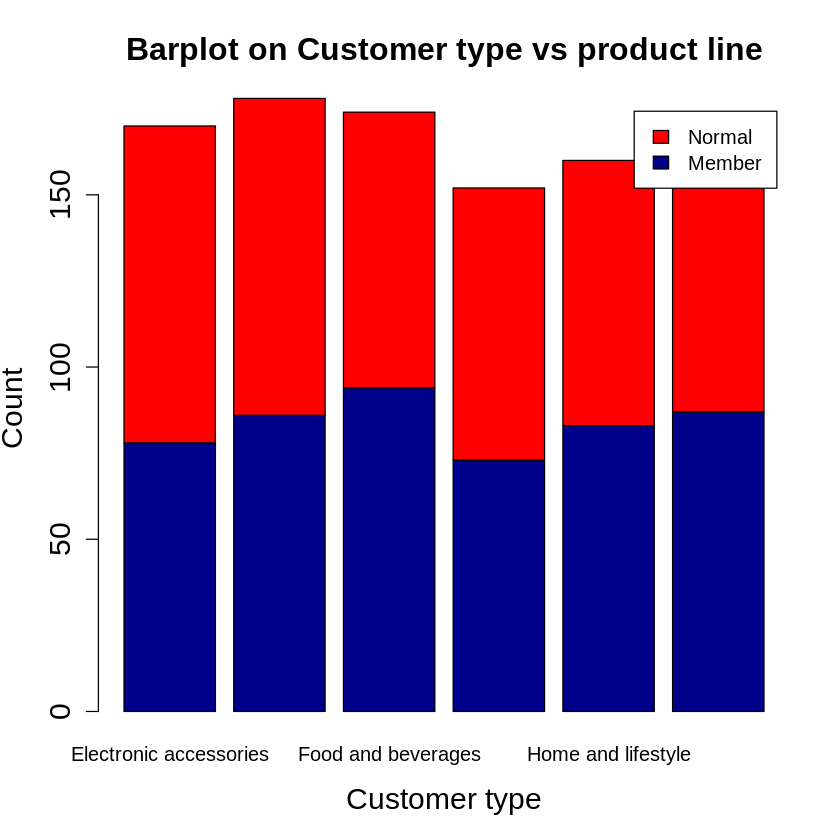

In [ ]:
# Stacked Bar Plot with Colors and Legend
#

counts <- table(Sales$Customer.type,Sales$Product.line)
barplot(counts, main="Barplot on Customer type vs product line",
xlab="Customer type", ylab = 'Count', col=c("darkblue","red"),
cex.lab=1.5, cex.axis=1.5, cex.main=1.6, cex.sub=1.5,
legend = rownames(counts))

#5. Feature engineering

In [ ]:
#Checking our sales data 
#

glimpse(Sales)

Rows: 1,000
Columns: 16
$ Invoice.ID              <chr> "750-67-8428", "226-31-3081", "631-41-3108", "…
$ Branch                  <chr> "A", "C", "A", "A", "A", "C", "A", "C", "A", "…
$ Customer.type           <chr> "Member", "Normal", "Normal", "Member", "Norma…
$ Gender                  <chr> "Female", "Female", "Male", "Male", "Male", "M…
$ Product.line            <chr> "Health and beauty", "Electronic accessories",…
$ Unit.price              <dbl> 74.69, 15.28, 46.33, 58.22, 86.31, 85.39, 68.8…
$ Quantity                <int> 7, 5, 7, 8, 7, 7, 6, 10, 2, 3, 4, 4, 5, 10, 10…
$ Tax                     <dbl> 26.1415, 3.8200, 16.2155, 23.2880, 30.2085, 29…
$ Date                    <chr> "1/5/2019", "3/8/2019", "3/3/2019", "1/27/2019…
$ Time                    <chr> "13:08", "10:29", "13:23", "20:33", "10:37", "…
$ Payment                 <chr> "Ewallet", "Cash", "Credit card", "Ewallet", "…
$ cogs                    <dbl> 522.83, 76.40, 324.31, 465.76, 604.17, 597.73,…
$ gross.margin.p

In [ ]:
#One-hot encoding of categorical variables
#

install.packages('dummies')
library(dummies)
Sales_final <- dummy.data.frame(Sales, names=c("Branch","Customer.type","Gender","Product.line",
                "Payment"), sep="_")
head(Sales_final)

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”


,Invoice.ID,Branch_A,Branch_B,Branch_C,Customer.type_Member,Customer.type_Normal,Gender_Female,Gender_Male,Product.line_Electronic accessories,Product.line_Fashion accessories,⋯,Date,Time,Payment_Cash,Payment_Credit card,Payment_Ewallet,cogs,gross.margin.percentage,gross.income,Rating,Total
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,1,0,0,1,0,1,0,0,0,⋯,1/5/2019,13:08,0,0,1,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,0,0,1,0,1,1,0,1,0,⋯,3/8/2019,10:29,1,0,0,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,1,0,0,0,1,0,1,0,0,⋯,3/3/2019,13:23,0,1,0,324.31,4.761905,16.2155,7.4,340.5255
4,123-19-1176,1,0,0,1,0,0,1,0,0,⋯,1/27/2019,20:33,0,0,1,465.76,4.761905,23.2880,8.4,489.0480
5,373-73-7910,1,0,0,0,1,0,1,0,0,⋯,2/8/2019,10:37,0,0,1,604.17,4.761905,30.2085,5.3,634.3785
6,699-14-3026,0,0,1,0,1,0,1,1,0,⋯,3/25/2019,18:30,0,0,1,597.73,4.761905,29.8865,4.1,627.6165


In [ ]:
#First checking out the class of each column

class <- sapply(Sales_final, class)
class

#Selecting only numerical variables
#

Sales_final_Num <- Sales_final %>% select(which(class != "character"))
head(Sales_final_Num)

Invoice.ID                            Branch_A 
                        "character"                           "integer" 
                           Branch_B                            Branch_C 
                          "integer"                           "integer" 
               Customer.type_Member                Customer.type_Normal 
                          "integer"                           "integer" 
                      Gender_Female                         Gender_Male 
                          "integer"                           "integer" 
Product.line_Electronic accessories    Product.line_Fashion accessories 
                          "integer"                           "integer" 
    Product.line_Food and beverages      Product.line_Health and beauty 
                          "integer"                           "integer" 
    Product.line_Home and lifestyle      Product.line_Sports and travel 
                          "integer"                           "integer" 
                         Unit.price                            Quantity 
                          "numeric"                           "integer" 
                                Tax                                Date 
                          "numeric"                         "character" 
                               Time                        Payment_Cash 
                        "character"                           "integer" 
                Payment_Credit card                     Payment_Ewallet 
                          "integer"                           "integer" 
                               cogs             gross.margin.percentage 
                          "numeric"                           "numeric" 
                       gross.income                              Rating 
                          "numeric"                           "numeric" 
                              Total 
                          "numeric"

,Branch_A,Branch_B,Branch_C,Customer.type_Member,Customer.type_Normal,Gender_Female,Gender_Male,Product.line_Electronic accessories,Product.line_Fashion accessories,Product.line_Food and beverages,⋯,Quantity,Tax,Payment_Cash,Payment_Credit card,Payment_Ewallet,cogs,gross.margin.percentage,gross.income,Rating,Total
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,0,1,0,1,0,0,0,0,⋯,7,26.1415,0,0,1,522.83,4.761905,26.1415,9.1,548.9715
2,0,0,1,0,1,1,0,1,0,0,⋯,5,3.8200,1,0,0,76.40,4.761905,3.8200,9.6,80.2200
3,1,0,0,0,1,0,1,0,0,0,⋯,7,16.2155,0,1,0,324.31,4.761905,16.2155,7.4,340.5255
4,1,0,0,1,0,0,1,0,0,0,⋯,8,23.2880,0,0,1,465.76,4.761905,23.2880,8.4,489.0480
5,1,0,0,0,1,0,1,0,0,0,⋯,7,30.2085,0,0,1,604.17,4.761905,30.2085,5.3,634.3785
6,0,0,1,0,1,0,1,1,0,0,⋯,7,29.8865,0,0,1,597.73,4.761905,29.8865,4.1,627.6165


#6. Dimensionality reduction

###Applying PCA

In [ ]:
#Applying PCA and checking pca summary
#and scaling the data as well
#

#First selecting and removing zero variance columns from the dataset so there is no effect in pca application
Zero_Variance <- which(apply(Sales_final_Num, 2, var)==0)
Sales_final_NumFin <- Sales_final_Num[ , which(apply(Sales_final_Num, 2, var) != 0)]

Sales_final_Num.pca <- prcomp(Sales_final_NumFin, center = TRUE, scale. = TRUE)
summary(Sales_final_Num.pca)

#We get a total of 23 principal omponents

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6    PC7
Standard deviation     2.2223 1.46210 1.39563 1.26089 1.24336 1.21767 1.2047
Proportion of Variance 0.2147 0.09294 0.08469 0.06912 0.06722 0.06447 0.0631
Cumulative Proportion  0.2147 0.30766 0.39235 0.46147 0.52868 0.59315 0.6562
                           PC8     PC9    PC10    PC11    PC12    PC13   PC14
Standard deviation     1.10422 1.09223 1.08526 1.08128 1.06881 0.98721 0.9699
Proportion of Variance 0.05301 0.05187 0.05121 0.05083 0.04967 0.04237 0.0409
Cumulative Proportion  0.70926 0.76113 0.81234 0.86317 0.91284 0.95521 0.9961
                          PC15      PC16      PC17      PC18      PC19
Standard deviation     0.29903 1.707e-15 9.029e-16 4.638e-16 3.146e-16
Proportion of Variance 0.00389 0.000e+00 0.000e+00 0.000e+00 0.000e+00
Cumulative Proportion  1.00000 1.000e+00 1.000e+00 1.000e+00 1.000e+00
                            PC20    PC21      PC22     PC23
Standard d

We get a total of 23 pricipal components and each explains a percentate of the total variation of the dataset.PC1 explains only 22% of the total variance, which means that only 22% of the information in the dataset (23 variables) can be encapsulated by just that one Principal Component which is a small percentage.PC2 explains 9% of the variance etc.

We can conclude that a better proportion of variance of around 71% can be explained by the first 8 principal components. 

In [ ]:
# Calling str() to have a look at your PCA object
# 
str(Sales_final_Num.pca)


List of 5
 $ sdev    : num [1:23] 2.22 1.46 1.4 1.26 1.24 ...
 $ rotation: num [1:23, 1:23] 0.01998 0.00543 -0.02561 -0.01772 0.01772 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:23] "Branch_A" "Branch_B" "Branch_C" "Customer.type_Member" ...
  .. ..$ : chr [1:23] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:23] 0.34 0.332 0.328 0.501 0.499 0.501 0.499 0.17 0.178 0.174 ...
  ..- attr(*, "names")= chr [1:23] "Branch_A" "Branch_B" "Branch_C" "Customer.type_Member" ...
 $ scale   : Named num [1:23] 0.474 0.471 0.47 0.5 0.5 ...
  ..- attr(*, "names")= chr [1:23] "Branch_A" "Branch_B" "Branch_C" "Customer.type_Member" ...
 $ x       : num [1:1000, 1:23] -2.0492 2.1937 -0.0692 -1.3973 -2.6467 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:1000] "1" "2" "3" "4" ...
  .. ..$ : chr [1:23] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


In above output we note the following pca objects: The center point(center), scaling(scale), standard deviation(sdev) of each principal component,The relationship(correlation or anticorrelation,etc) between the initial variables and the principal components rotation) and, The values of each sample in terms of the principal components(x).

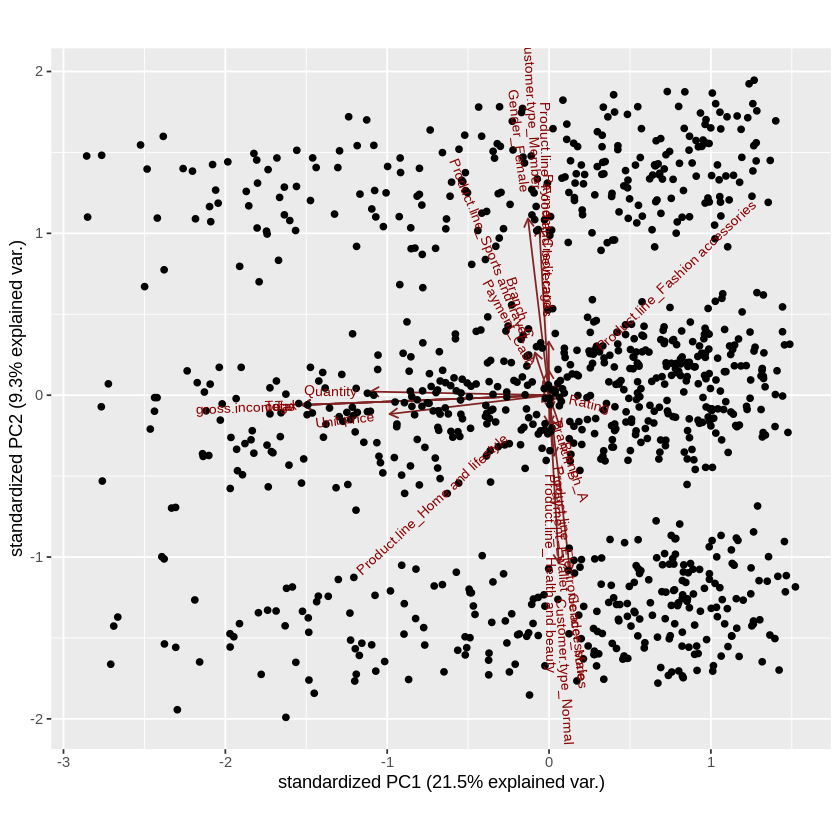

In [ ]:
#Now plotting our pca plot

#Installing our ggbiplot visualisation package
install.packages('devtools')
library(devtools)
install_github("vqv/ggbiplot")


#Then Loading our ggbiplot library  
install.packages('ggbiplot')
library(ggbiplot)

ggbiplot(Sales_final_Num.pca, width=130, height=8,color='grey')


From the above PCA plot we do notice that some of the variables that contribute most to PC1 are Gender(Female), Customer type(Normal), Quantity, Branch and Product line(Fashion accessories, Home and lifestyle, Health and beauty).

#7. Insights from dimensionality reduction

We were able to perform dimensionalty reduction using PCA and some of the insights gained from the analysis is that Carrefour Kenya should focus on market strategies aimed at:The female gender, Normal customers, Branches and Main Product lines of Fashion accessories, Home and lifestyle, Health and beauty.